In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO("./weights/yolov8n.pt")

In [ ]:
results = model.predict(source="./samples")

In [23]:
import cv2
img = cv2.imread("./samples/cars.jpg")
results = model(img, iou=0.6, verbose=False)[0]

results.boxes.xyxy


tensor([[ 674.,  435.,  938.,  645.],
        [ 819.,  628., 1138.,  880.],
        [1267.,  500., 1574.,  742.],
        [ 301.,  279.,  420.,  364.],
        [ 881.,  971., 1254., 1075.],
        [ 613.,  366.,  827.,  556.],
        [ 518.,  296.,  707.,  467.],
        [ 945.,  306., 1162.,  488.],
        [ 131.,  205.,  262.,  366.],
        [ 433.,  322.,  516.,  361.]], device='cuda:0')


0: 384x640 9 cars, 1 truck, 79.1ms
Speed: 1.0ms pre-process, 79.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


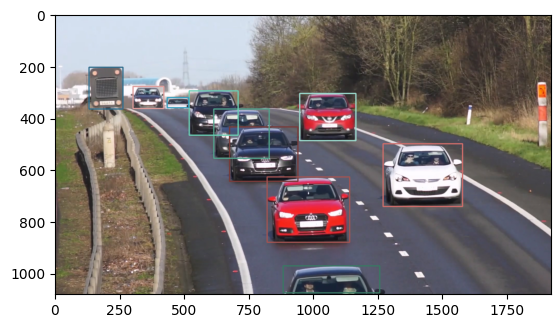

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread("./samples/cars.jpg")
cmap = plt.get_cmap('tab20b')
colors = [cmap(i)[:3] for i in np.linspace(0, 1, 20)]

results = model(img, iou=0.6, verbose=True)[0]

for i,result in enumerate(results):
    color = colors[i % len(colors)]
    color = [i*255 for i in color]
    bbox = result.boxes.xyxy.cpu().squeeze()
    cv2.rectangle(img, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), color, 4)
    
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)